In [1]:
%load_ext autoreload
%autoreload 2
from experiment_setup import MNIST_Experiment

In [2]:
conf = MNIST_Experiment('params/mirror-tmp.yaml',data_path = "../../../../datasets/")

In [3]:
f = conf.get_objective()
x = conf.init_x()

dyn = conf.dyn_cls(f, x=x, **conf.dyn_kwargs)
sched = conf.get_scheduler()
dyn.optimize(sched=sched)

<><><><><><><><><><><><><><><><><><><><><><><><><><><><><><>
Epoch: 1
Accuracy: 0.3231000006198883
Sparsity: 0.8703939318656921
<><><><><><><><><><><><><><><><><><><><><><><><><><><><><><>
Epoch: 2
Accuracy: 0.3935000002384186
Sparsity: 0.8734434843063354
<><><><><><><><><><><><><><><><><><><><><><><><><><><><><><>
Epoch: 3
Accuracy: 0.5347999930381775
Sparsity: 0.8602287173271179
<><><><><><><><><><><><><><><><><><><><><><><><><><><><><><>
Epoch: 4
Accuracy: 0.6105999946594238
Sparsity: 0.8543837666511536
<><><><><><><><><><><><><><><><><><><><><><><><><><><><><><>
Epoch: 5
Accuracy: 0.602899968624115
Sparsity: 0.8611181974411011
<><><><><><><><><><><><><><><><><><><><><><><><><><><><><><>
Epoch: 6
Accuracy: 0.7071999907493591
Sparsity: 0.8449809551239014
<><><><><><><><><><><><><><><><><><><><><><><><><><><><><><>
Epoch: 7
Accuracy: 0.7129999995231628
Sparsity: 0.8449809551239014
<><><><><><><><><><><><><><><><><><><><><><><><><><><><><><>
Epoch: 8
Accuracy: 0.7091000080108643
Sparsi

In [4]:
conf.evaluate_dynamic(dyn)

Sparsity: 0.5480305
Accuracy: 0.88809997


In [5]:
w = dyn.best_particle[0,:]
W = w[:28*28*10].reshape(10,28*28)

In [6]:
model = dyn.f.model

## Assign best weights

In [7]:
model.linears[0].weight.data = w[:28*28*10].reshape(10,28*28)
model.linears[0].bias.data = w[28*28*10:(28*28*10+10)]
model.bns[0].weight.data = w[(28*28*10+10):(28*28*10+20)]
model.bns[0].bias.data = w[(28*28*10+20):(28*28*10+30)]

## Visualize sparsity pattern

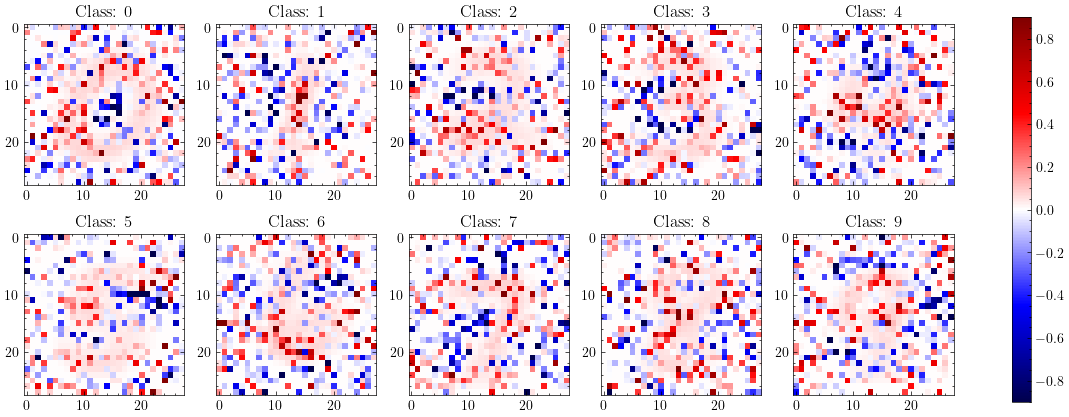

In [14]:
import matplotlib.pyplot as plt
import scienceplots
plt.style.use(['science'])
fig, ax = plt.subplots(2,5, figsize=(15,5))
ax  = ax.ravel()
ds = conf.train_loader.dataset
for i in range(10):
    mean = 0.1*((ds.data[conf.train_loader.dataset.targets == i])/255.).mean(dim=0)
    im = ax[i].imshow(W[i,:].reshape(28,28).cpu() + mean, vmin=-0.9, vmax=.9, cmap='seismic')
    ax[i].set_title('Class: ' + str(i))
#fig.subplots_adjust(right=0.9)
#cbar_ax = fig.add_axes([0.95, 0.05, 0.05, 0.7])
fig.colorbar(im, ax=ax.tolist())
#plt.tight_layout(pad=0)
plt.savefig('results/act_map.png', dpi=600)